# Chapter 1 - Exercises

In [79]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
from tqdm import tqdm
import pprint

%matplotlib inline

## 1.1 

Express each of the following tasks in the framework of learning from data by specifying the input space $X$, output space $Y$, target function $f:\ X \to Y$ and the specifics of the data set that we will learn from.

**(a)** Medical diagnosis: A patient walks in with a medical history and some symptoms, and you want to identify the problem.

<font color=firebrick>Solution:</font>

$X$ : symptoms of past deseases

$Y$ : past deseases

$f$ : associate symptoms to corresponding desease

Specifics of the data : vector of possible symptons and the desease. Symptons as booleans.

**(b)** Handwritten digit recognition (for example postal zip code recognition for mail sorting).

<font color=firebrick>Solution:</font>

$X$ : pixel correspondending to a handwritten digit

$Y$ : number represented by the pixels

$f$ : associate the pixel of a handwritten digit to a number

Specifics of the data : individual image for each number of the zip code and a label of its corresponding number

**(c)** Determining if an email is spam or not.

<font color=firebrick>Solution:</font>

$X$ : vector of words in each email

$Y$ : label if it's spam or not

$f$ : classify if the email is spam based on the words in the message

Specifics of the data : corpus and title of an email tokenized, and a label it's spam or not

**(d)** Predicting how an electric load varies with price, temperature, and day of the week.

<font color=firebrick>Solution:</font>

$X$ : vector with price, temperature and day of the week

$Y$ : electricity consumption

$f$ : associate the electricity consumption based on price, temperature and day

Specifics of the data : vector with price, temperature, day and electricity consumption

**(e)** A problem of interest to you for which there is no analytic solution, but you have data from which to construct an empirical solution.

<font color=firebrick>Solution:</font>

$X$ : audio call recording

$Y$ : mood during the call

$f$ : associate words and how it's said to the emotional state of the speakers

Specifics of the data : audio recordings and time stamped labels of the emotional stateof the speakers

## 1.2

Suppose that we use a perceptron to detect spam messages. Let's say that each email message is represented by the frequency of occurrence of keywords, and the output is if the message is considered spam.

**(a)** Can you think of some keywords that will end up with a large positive weight in the perceptron?

<font color=firebrick>Solution:</font>

Deal, sale, promo, sex, win

**(b)** How about keywords that will get a negative weight?

<font color=firebrick>Solution:</font>

uncle, aunt, meeting, appointment

**(c)** What parameter in the perceptron directly affects how many border line messages end up being classified as spam?

<font color=firebrick>Solution:</font>

the weights

## 1.3

The weight update rule in {1.3) has the nice interpretation that it moves in the direction of classifying $x(t)$ correctly.

**(a)** Show that $$y(t) \cdot w^T(t) \cdot x(t) < 0$$
[Hint: $x(t)$ is misclassified by $w(t)$.]

<font color=firebrick>Solution:</font>
    
$$ w^T(t) \cdot x(t) \textrm{ misclassified} \Rightarrow \textrm{sign}[w^T(t) \cdot x(t)] = - y(t)$$

$$\Rightarrow y(t) \cdot w^T(t) \cdot x(t) < 0$$

**(b)** Show that $$y(t) \cdot w^T(t+ 1) \cdot x(t) > y(t) \cdot w^T(t) \cdot x(t)$$  [Hint: Use (1.3).]

<font color=firebrick>Solution:</font>

$$
    y(t) \cdot w^T(t+ 1) \cdot x(t) \quad = \quad y(t) \cdot w^T(t) \cdot x(t) \quad + \quad \underbrace{y(t) \cdot y^T(t)\cdot x^T(t) \cdot x(t)}_{>0} \quad >  \quad y(t) \cdot w^T(t) \cdot x(t)
$$ 


**(c)** As far as classifying $x(t)$ is concerned, argue that the move from $w(t)$ to $w(t + 1)$ is a move 'in the right direction'.

<font color=firebrick>Solution:</font>

As we know that misclassified $f(x)$ have $y(t) \cdot w^T(t) \cdot x(t) < 0$. 

To move toward a correct classification, $y(t) \cdot w^T(t+ 1) \cdot x(t)$ must be greater than $ y(t) \cdot w^T(t) \cdot x(t)$.

Choosing the increment as $y(t) \cdot x(t) $ we can guarantee that $y(t) \cdot w^T(t+ 1) \cdot x(t) > y(t) \cdot w^T(t) \cdot x(t)$.

## 1.4

Let us create our own target function $f$ and data set $D$ and see how the perceptron learning algorithm works. Take $d = 2$ so you can visualize the problem, and choose a random line in the plane as your target function, where one side of the line maps to 1 and the other maps to -1. Choose the inputs $x_n$ of the data set as random points in the plane, and evaluate the target function on each $x_n$ to get the corresponding output $y_n$·

Now, generate a data set of size 20. Try the perceptron learning algorithm on your data set and see how long it takes to converge and how well the final hypothesis $g$ matches your target $f$. You can find other ways to play with this experiment in Problem 1.4.

<font color=firebrick>Solution:</font>



In [233]:
#dimension(d) and sample size(n)
d = 2
n = 20

#classfication line
fx = np.matrix('-0.5;0.5;0.5')

In [266]:
#generate sample
x = np.random.uniform(-1,1, [d,n])
x0 = np.ones((1,n))

x = np.matrix(np.vstack((x0, x)))


y = np.matrix(np.sign(fx.dot(x)))

#starting weight

pp = pprint.PrettyPrinter(indent=1)
pp.pprint(x)
pp.pprint(y)


ValueError: shapes (3,1) and (3,20) not aligned: 1 (dim 1) != 3 (dim 0)

In [248]:
def perceptron(w, x, y):
    
    #randomly select one observation
    k = random.choice(range(x.shape[1]))
    
    #verify if prediction is equal to the real value
    y_hat = w.T*x[0:x.shape[0],k]
    
    if y_hat != y[0,k]:
        w = w + x[0:x.shape[0],k]*y[0,k]
        
    return w

In [249]:
w = np.matrix(np.zeros((d + 1,1)))

for i in range(1000):
    w = perceptron(w,x,y)

print(w)

[[ -24.        ]
 [  97.04624426]
 [ 219.89147749]]


In [243]:
x[0:x.shape[0],k]*y[0,k]

matrix([[ 1.        ],
        [ 0.42865308],
        [ 0.94793688]])

In [250]:
w = np.matrix(np.zeros((d + 1,1)))

In [253]:
k = random.choice(range(x.shape[1]))
    
    #verify if prediction is equal to the real value
y_hat = w.T*x[0:x.shape[0],k]

In [265]:
np.random.uniform(-1,1, [2,2])

array([[ 0.69976721,  0.75510071],
       [ 0.68233327, -0.59852036]])

In [267]:
x

matrix([[  1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
           1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
           1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
           1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
           1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
           1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
           1.00000000e+00,   1.00000000e+00],
        [ -8.78764726e-01,   6.04143409e-01,   2.00616776e-01,
           5.06164139e-01,   6.18474933e-01,   5.56383840e-04,
          -5.46165369e-01,   3.10697716e-02,   2.27288961e-01,
          -5.86362934e-01,   1.25877501e-01,   1.28372276e-01,
           3.13897601e-02,  -3.72544208e-01,  -9.90115795e-01,
           4.97865551e-01,   5.77180131e-01,  -9.08361237e-02,
          -1.54863803e-01,  -8.87248156e-01],
        [  8.72330581e-01,   5.06316857e-01,  -9.16786785e-02,
          -5.35106263e-01,  -6.61652725e-01,   7.58127740e-01,
          -3.81270873e-01,

In [2]:
flips = []
sample_size = 10

#gera o sample
for i in range(0,1000):
        flips.append(stats.bernoulli.rvs(0.5, size = sample_size))


#gera as moedas dos teste
c_1 =  flips[0]
c_rand = flips[random.randrange(1000)]


min_heads = min([sum(x) for x in flips])

for i in range(0,1000):
    if sum(flips[i]) == min_heads:
        c_min = flips[i]
        break


v_1 = np.mean(c_1)
v_rand = np.mean(c_rand)
v_min = np.mean(c_min)


print(f"v_1 = {v_1}")
print(f"v_rand = {v_rand}")
print(f"v_min = {v_min}")

v_1 = 0.7
v_rand = 0.4
v_min = 0.1


b)

In [53]:
sample_size = 10
experiments = 10**3


v_1_list = []
v_rand_list = []
v_min_list = []

for n in tqdm(range(experiments)):
    
    flips = []

    #gera o sample
    for i in range(0,1000):
        flips.append(stats.bernoulli.rvs(0.5, size = sample_size))


    #gera as moedas dos teste
    c_1 =  flips[0]
    c_rand = flips[random.randrange(1000)]


    min_heads = min([sum(x) for x in flips])

    for j in range(0,1000):
        if sum(flips[j]) == min_heads:
            c_min = flips[j]
            break


    v_1 = np.mean(c_1)
    v_rand = np.mean(c_rand)
    if min_heads == 0:
        v_min = 0
    else:
        v_min = np.mean(c_min)

    v_1_list.append(v_1)
    v_rand_list.append(v_rand)
    v_min_list.append(v_min)

100%|██████████| 1000/1000 [00:58<00:00, 18.32it/s]


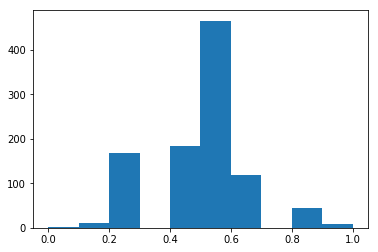

In [58]:
plt.hist(v_1_list, bins =  np.arange(0, 1.1, 0.1))
plt.show()

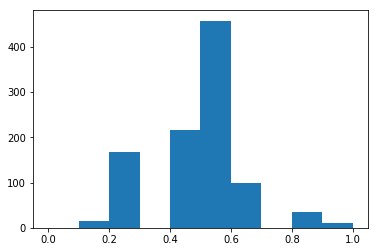

In [59]:
plt.hist(v_rand_list, bins =  np.arange(0, 1.1, 0.1))
plt.show()

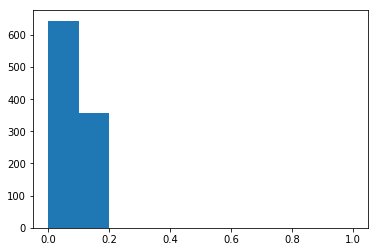

In [60]:
plt.hist(v_min_list, bins =  np.arange(0, 1.1, 0.1))
plt.show()

c)

In [101]:
def probability(e, experiments):
   return sum(abs(np.asarray(v_rand_list) - 0.5) > e)/experiments

In [123]:
e = np.arange(0, 1.01, 0.01)
prob = [probability(x, 1000) for x in list(e)]
bound = [2*math.exp(-2*(x**2) * 1000) for x in list(e)]

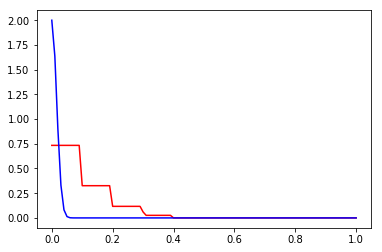

In [124]:
plt.plot(e, prob,'r') # plotting t,a separately 
plt.plot(e, bound,'b') # plotting t,b separately 
plt.show()

In [111]:
probability(0.1, 1000)

0.32600000000000001

In [113]:
math.exp(-2 * (0.2**2) * 1000)

1.8048513878453896e-35

In [117]:
sum([True, False])

1

In [125]:
.45**1000

0.0

In [131]:
1-stats.binom.pmf(0, 1000, 0.45**10)

0.2886311978498084

In [132]:
0.45**10

0.00034050628916015635